### #Importing libraries for data visualization and machine learning models


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

###  #Load the CSV file and show the first few rows


In [47]:
import pandas as pd
df = pd.read_csv('train.csv')

df.head()

,Employee ID,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
0,8410,31,Male,Education,5390,Excellent,2,22,Associate Degree,Married,Mid,Medium,No,Stayed
1,21896,47,Female,Technology,9039,Fair,3,78,Associate Degree,Married,Entry,Small,No,Left
2,28098,31,Male,Healthcare,8090,Fair,0,30,Associate Degree,Divorced,Mid,Small,No,Stayed
3,20748,48,Male,Education,4987,Fair,1,92,Associate Degree,Divorced,Entry,Medium,No,Left
4,65251,45,Female,Healthcare,7571,Good,0,30,Associate Degree,Married,Entry,Small,Yes,Stayed


### #Show summary info about the dataset

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Employee ID           59598 non-null  int64 
 1   Age                   59598 non-null  int64 
 2   Gender                59598 non-null  object
 3   Job Role              59598 non-null  object
 4   Monthly Income        59598 non-null  int64 
 5   Work-Life Balance     59598 non-null  object
 6   Number of Promotions  59598 non-null  int64 
 7   Distance from Home    59598 non-null  int64 
 8   Education Level       59598 non-null  object
 9   Marital Status        59598 non-null  object
 10  Job Level             59598 non-null  object
 11  Company Size          59598 non-null  object
 12  Remote Work           59598 non-null  object
 13  Attrition             59598 non-null  object
dtypes: int64(5), object(9)
memory usage: 6.4+ MB
None


### #Show basic statistics of numerical columns


In [49]:
display(df.describe())

,Employee ID,Age,Monthly Income,Number of Promotions,Distance from Home
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,7302.397983,0.832578,50.007651
std,21519.150028,12.079673,2151.457423,0.994991,28.466459
min,1.000000,18.000000,1316.000000,0.000000,1.000000
25%,18580.250000,28.000000,5658.000000,0.000000,25.000000
50%,37209.500000,39.000000,7354.000000,1.000000,50.000000
75%,55876.750000,49.000000,8880.000000,2.000000,75.000000
max,74498.000000,59.000000,16149.000000,4.000000,99.000000


### #Show stats for categorical columns and remove 'Employee ID' column


In [50]:
display(df.describe(include=['O']))

,Gender,Job Role,Work-Life Balance,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
count,59598,59598,59598,59598,59598,59598,59598,59598,59598
unique,2,5,4,5,3,3,3,2,2
top,Male,Technology,Good,Bachelor's Degree,Married,Entry,Medium,No,Stayed
freq,32739,15507,22528,17826,29908,23867,29745,48239,31260


In [51]:
df.drop('Employee ID', axis=1, inplace= True)
df.head()

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
0,31,Male,Education,5390,Excellent,2,22,Associate Degree,Married,Mid,Medium,No,Stayed
1,47,Female,Technology,9039,Fair,3,78,Associate Degree,Married,Entry,Small,No,Left
2,31,Male,Healthcare,8090,Fair,0,30,Associate Degree,Divorced,Mid,Small,No,Stayed
3,48,Male,Education,4987,Fair,1,92,Associate Degree,Divorced,Entry,Medium,No,Left
4,45,Female,Healthcare,7571,Good,0,30,Associate Degree,Married,Entry,Small,Yes,Stayed


### #Count and show how many missing values are in each column


In [52]:
missing_values = df.isnull().sum()
missing_values

,0
Age,0
Gender,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Number of Promotions,0
Distance from Home,0
Education Level,0
Marital Status,0
Job Level,0


### #Show a bar chart of Work-Life Balance levels vs Attrition


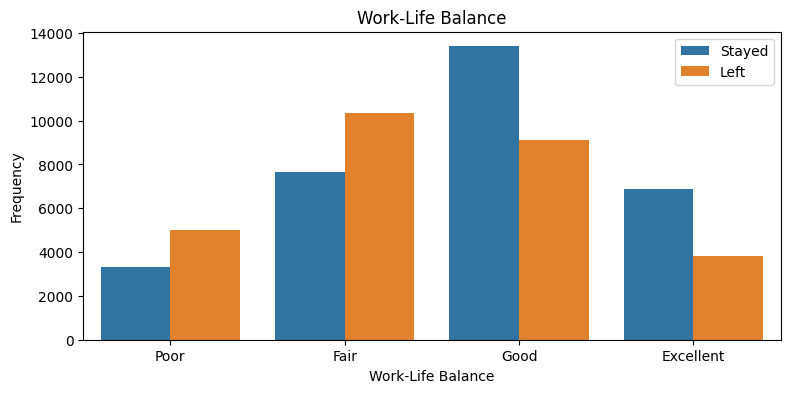

In [53]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='Work-Life Balance', hue="Attrition", order=['Poor','Fair','Good','Excellent'])
plt.title('Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### #Plot count of promotions by attrition status


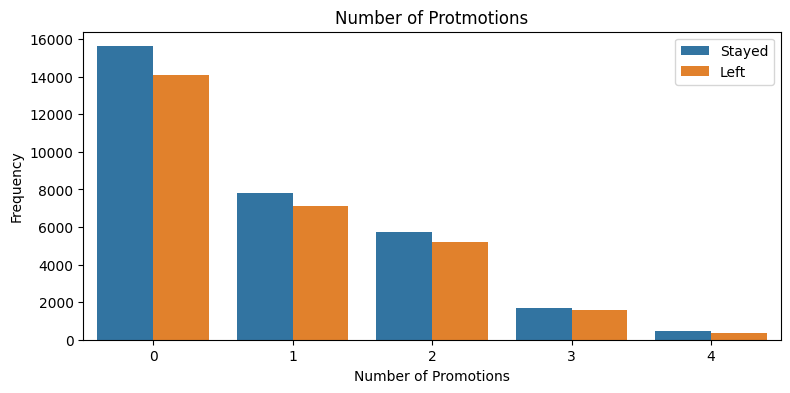

In [56]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='Number of Promotions', hue="Attrition")
plt.title('Number of Protmotions')
plt.xlabel('Number of Promotions')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### #Show pair plots of key numeric features colored by attrition


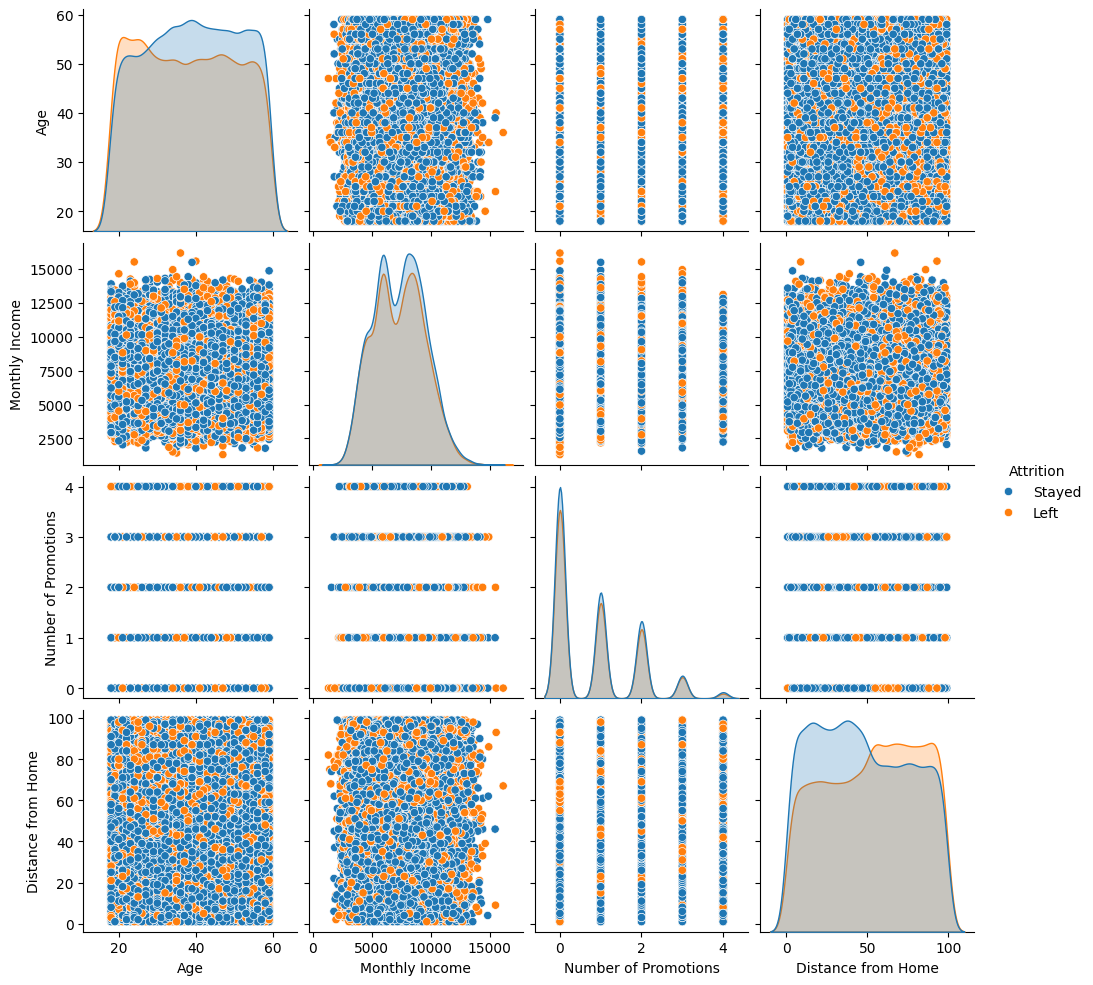

In [57]:
sns.pairplot(data=df, vars=['Age',  'Monthly Income', 'Number of Promotions','Distance from Home'], hue='Attrition')
plt.show()

### #Convert 'Attrition' from text to numbers using label encoding


In [58]:
le_attrition = LabelEncoder()
df['Attrition'] = le_attrition.fit_transform(df['Attrition'])
df

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
0,31,Male,Education,5390,Excellent,2,22,Associate Degree,Married,Mid,Medium,No,1
1,47,Female,Technology,9039,Fair,3,78,Associate Degree,Married,Entry,Small,No,0
2,31,Male,Healthcare,8090,Fair,0,30,Associate Degree,Divorced,Mid,Small,No,1
3,48,Male,Education,4987,Fair,1,92,Associate Degree,Divorced,Entry,Medium,No,0
4,45,Female,Healthcare,7571,Good,0,30,Associate Degree,Married,Entry,Small,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,32,Male,Media,6508,Fair,1,91,PhD,Married,Mid,Medium,Yes,1
59594,47,Male,Healthcare,6582,Poor,3,26,PhD,Divorced,Entry,Small,No,0
59595,34,Female,Technology,8813,Fair,0,93,PhD,Divorced,Mid,Medium,No,0
59596,41,Male,Technology,9974,Fair,0,69,PhD,Single,Mid,Medium,No,0


### #Display correlation heatmap of selected features including Attrition


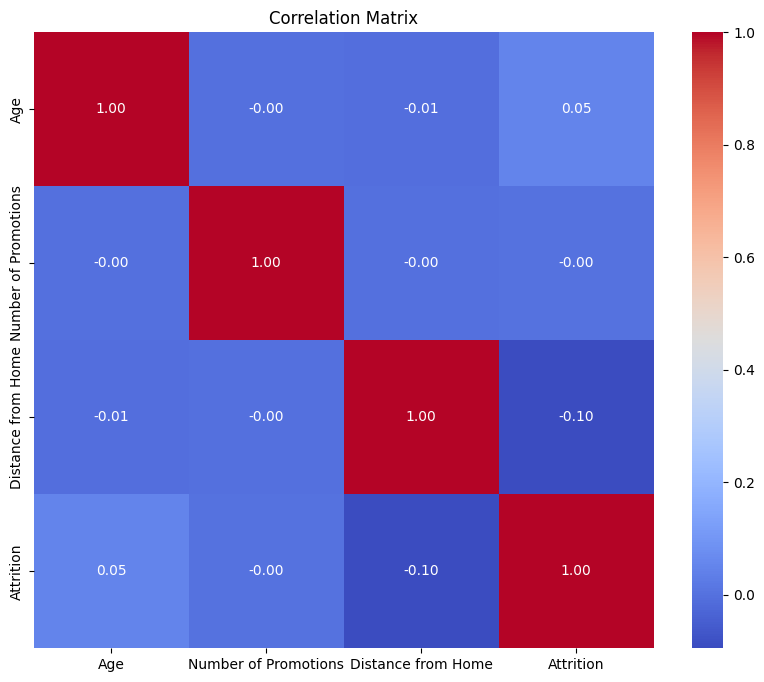

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Number of Promotions', 'Distance from Home', 'Attrition']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### #Convert Attrition back to original labels and plot income by job role with attrition


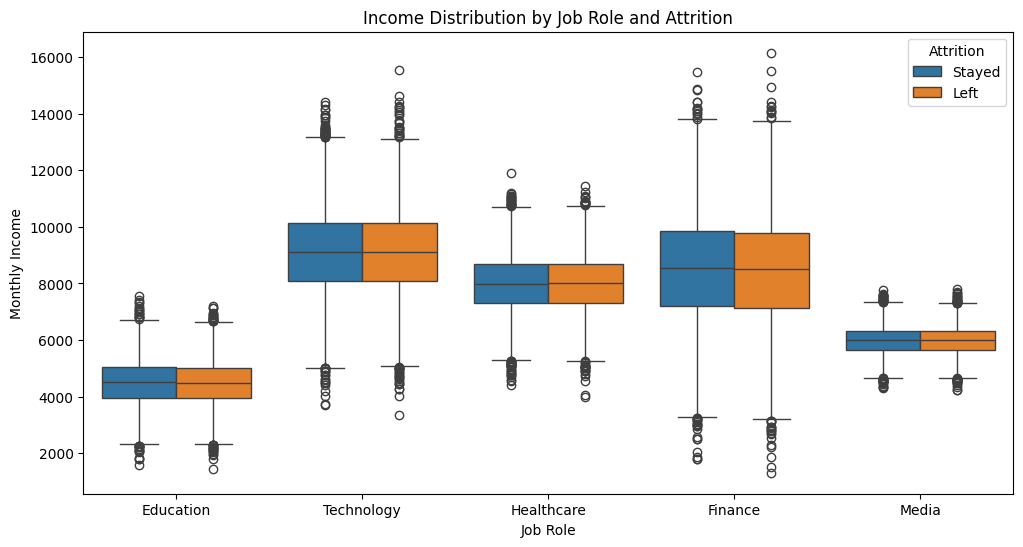

In [60]:
df['Attrition'] = le_attrition.inverse_transform(df['Attrition'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Role', y='Monthly Income', hue='Attrition', data=df)
plt.title('Income Distribution by Job Role and Attrition')
plt.show()

### #Create violin plot of income by job role, split by attrition status


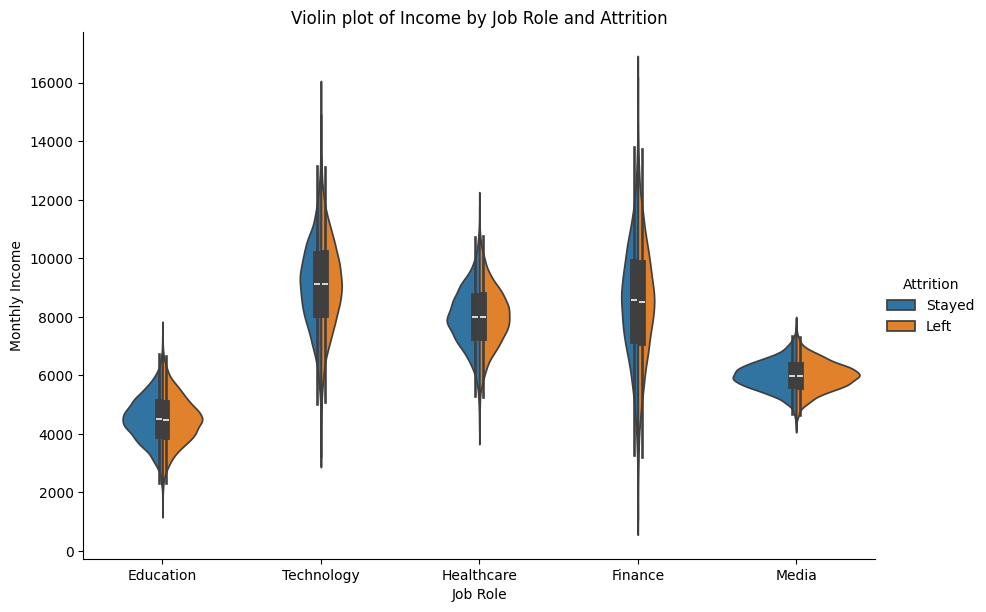

In [61]:
sns.catplot(x='Job Role', y='Monthly Income', hue='Attrition', data=df, kind='violin', split=True, height=6, aspect=1.5)
plt.title('Violin plot of Income by Job Role and Attrition')
plt.show()

### #Perform Chi-squared test on categorical features vs Attrition and plot p-values


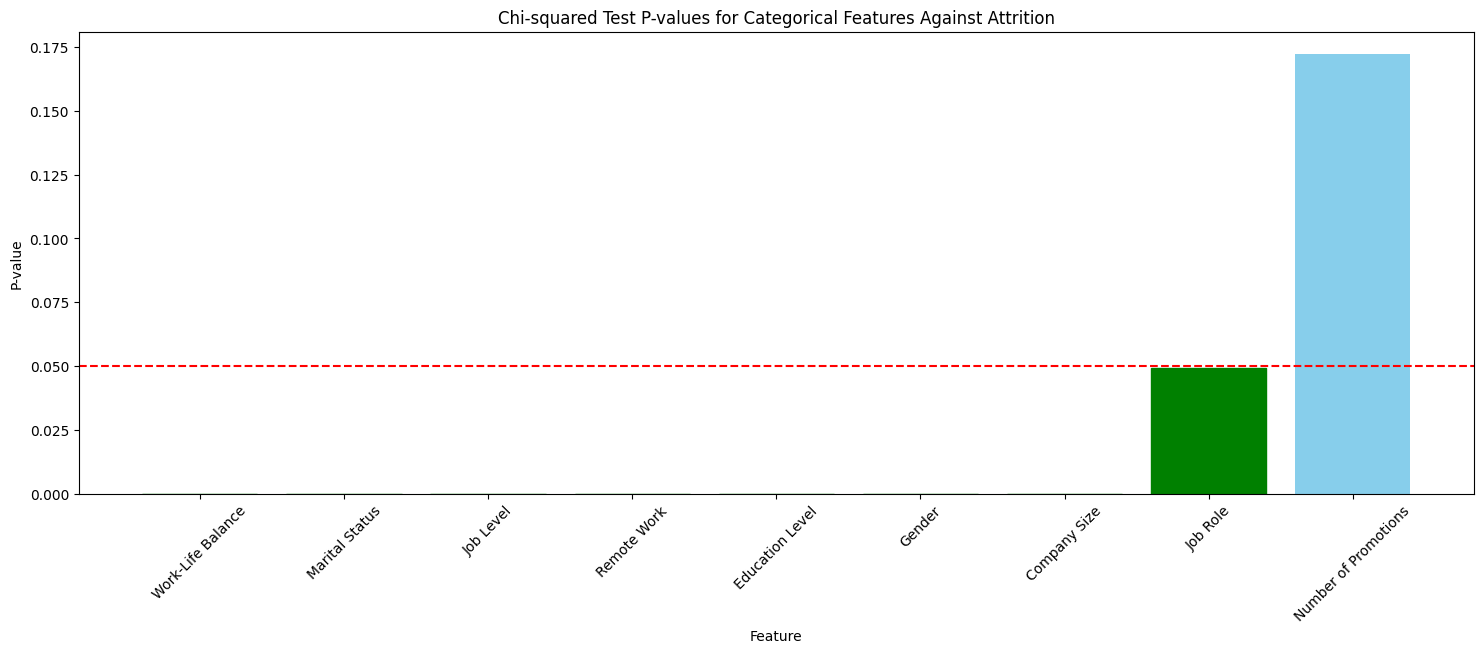

{'Work-Life Balance': np.float64(0.0),
 'Marital Status': np.float64(0.0),
 'Job Level': np.float64(0.0),
 'Remote Work': np.float64(0.0),
 'Education Level': np.float64(4.613726820918119e-145),
 'Gender': np.float64(2.582045435566851e-136),
 'Company Size': np.float64(8.04702915333768e-13),
 'Job Role': np.float64(0.049083731053792615),
 'Number of Promotions': np.float64(0.17242165092682366)}

In [62]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

from scipy.stats import chi2_contingency


categorical_cols = df.select_dtypes(include=['object', 'category', 'int']).columns.drop('Attrition')

chi_squared_p_values = {}


for col in categorical_cols:
    if df[col].nunique() < 10:
        contingency_table = pd.crosstab(df[col], df['Attrition'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_squared_p_values[col] = p

sorted_chi_squared_p_values = dict(sorted(chi_squared_p_values.items(), key=lambda item: item[1]))


plt.figure(figsize=(18, 6))
bars = plt.bar(sorted_chi_squared_p_values.keys(), sorted_chi_squared_p_values.values(), color='skyblue')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.title('Chi-squared Test P-values for Categorical Features Against Attrition')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.xticks(rotation=45)


for bar in bars:
    if bar.get_height() < 0.05:
        bar.set_color('green')

plt.show()
sorted_chi_squared_p_values

### #Group ages into bins and plot attrition counts by age category


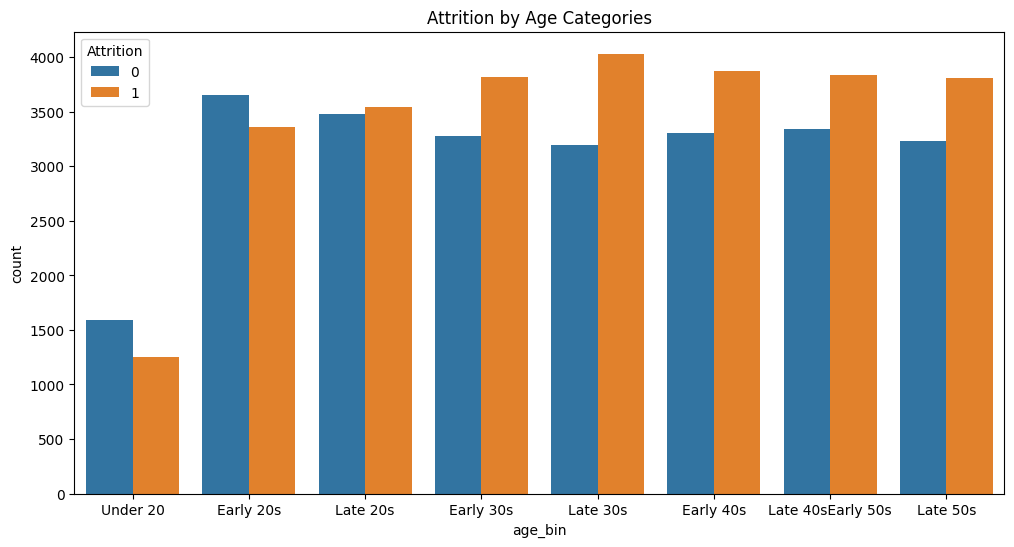

In [63]:
df['age_bin'] = pd.cut(df['Age'], bins=[18, 20, 25, 30, 35, 40, 45, 50, 55], labels=['Under 20', 'Early 20s', 'Late 20s', 'Early 30s', 'Late 30s','Early 40s', 'Late 40s''Early 50s', 'Late 50s'])


plt.figure(figsize=(12, 6))
sns.countplot(x='age_bin', hue='Attrition', data=df)
plt.title('Attrition by Age Categories')
plt.show()

### #Data Preprocessing

In [64]:
df = pd.read_csv('train.csv')
df.drop('Employee ID', axis=1, inplace= True)

### #Encode categorical columns (Attrition, Gender, Marital Status, Remote Work) into numbers


In [65]:
le_gender = LabelEncoder()
le_marital = LabelEncoder()
le_remote = LabelEncoder()



df['Attrition'] = le_attrition.fit_transform(df['Attrition'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Marital Status'] = le_marital.fit_transform(df['Marital Status'])
df['Remote Work'] = le_remote.fit_transform(df['Remote Work'])

In [66]:
df

,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Remote Work,Attrition
0,31,1,Education,5390,Excellent,2,22,Associate Degree,1,Mid,Medium,0,1
1,47,0,Technology,9039,Fair,3,78,Associate Degree,1,Entry,Small,0,0
2,31,1,Healthcare,8090,Fair,0,30,Associate Degree,0,Mid,Small,0,1
3,48,1,Education,4987,Fair,1,92,Associate Degree,0,Entry,Medium,0,0
4,45,0,Healthcare,7571,Good,0,30,Associate Degree,1,Entry,Small,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,32,1,Media,6508,Fair,1,91,PhD,1,Mid,Medium,1,1
59594,47,1,Healthcare,6582,Poor,3,26,PhD,0,Entry,Small,0,0
59595,34,0,Technology,8813,Fair,0,93,PhD,0,Mid,Medium,0,0
59596,41,1,Technology,9974,Fair,0,69,PhD,2,Mid,Medium,0,0


### #One-hot encode selected categorical columns and update the dataframe


In [67]:
columns_to_be_encoded = ['Job Role', 'Work-Life Balance', 'Education Level','Job Level','Company Size']
one_hot_encoded_data = pd.get_dummies(df[columns_to_be_encoded], columns = columns_to_be_encoded, dtype=int)
df_OHE = pd.concat([df, one_hot_encoded_data], axis=1)
df_OHE.drop(columns = columns_to_be_encoded, axis = 1, inplace = True)
df_OHE

,Age,Gender,Monthly Income,Number of Promotions,Distance from Home,Marital Status,Remote Work,Attrition,Job Role_Education,Job Role_Finance,...,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Level_Entry,Job Level_Mid,Job Level_Senior,Company Size_Large,Company Size_Medium,Company Size_Small
0,31,1,5390,2,22,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,47,0,9039,3,78,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,31,1,8090,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,48,1,4987,1,92,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,45,0,7571,0,30,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,32,1,6508,1,91,1,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
59594,47,1,6582,3,26,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
59595,34,0,8813,0,93,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
59596,41,1,9974,0,69,2,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


### #Load test data, encode categorical features, and apply one-hot encoding like training data


In [68]:
df_test = pd.read_csv('test.csv')
df_test.drop('Employee ID', axis=1, inplace= True)
df_test['Attrition'] = le_attrition.fit_transform(df_test['Attrition'])
df_test['Gender'] = le_gender.fit_transform(df_test['Gender'])
df_test['Marital Status'] = le_marital.fit_transform(df_test['Marital Status'])
df_test['Remote Work'] = le_remote.fit_transform(df_test['Remote Work'])
one_hot_encoded_data_test = pd.get_dummies(df_test[columns_to_be_encoded], columns = columns_to_be_encoded, dtype=int)
df_test_OHE = pd.concat([df_test, one_hot_encoded_data_test], axis=1)
df_test_OHE.drop(columns = columns_to_be_encoded, axis = 1, inplace = True)
df_test_OHE

,Age,Gender,Monthly Income,Number of Promotions,Distance from Home,Marital Status,Remote Work,Attrition,Job Role_Education,Job Role_Finance,...,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Level_Entry,Job Level_Mid,Job Level_Senior,Company Size_Large,Company Size_Medium,Company Size_Small
0,35,1,4563,1,55,2,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,50,1,5583,3,14,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,45,0,8104,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,48,0,11452,0,65,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,55,0,5939,0,31,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,37,1,4145,0,80,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
14896,53,1,8757,0,19,2,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
14897,46,1,7721,1,43,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
14898,31,1,4784,1,25,2,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0


 #Model Building

### #Train and evaluate Logistic Regression, XGBoost, and SVM models with scaled data; print classification reports, metrics, confusion matrices, and ROC curves


Results from model:  Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      7032
           1       0.74      0.74      0.74      7868

    accuracy                           0.73     14900
   macro avg       0.73      0.73      0.73     14900
weighted avg       0.73      0.73      0.73     14900

Accuracy: 0.727
Precision: 0.727
Recall: 0.727
F1 Score: 0.727
Binary Cross Entropy: 9.850
AUC-ROC: 0.7261052387140954


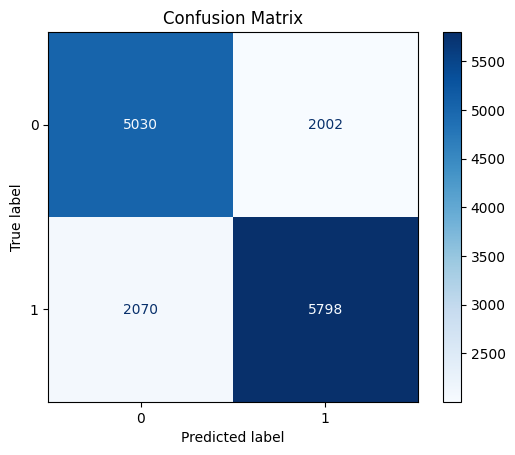

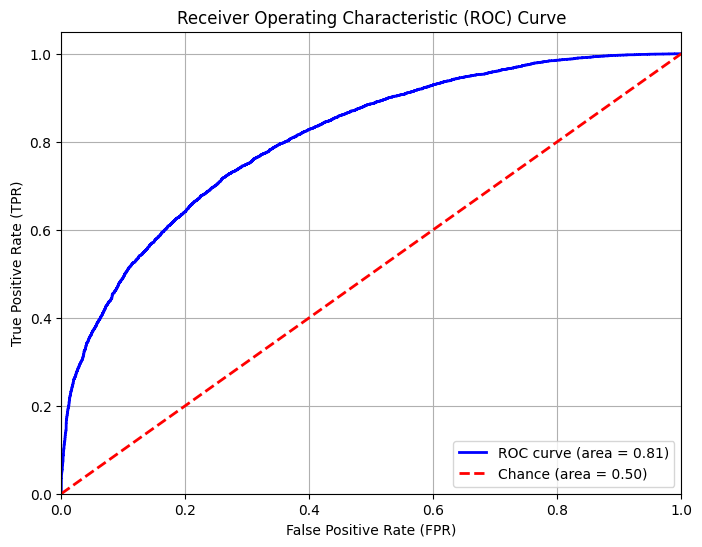

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:33:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Results from model:  xgb_model
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7032
           1       0.74      0.75      0.74      7868

    accuracy                           0.73     14900
   macro avg       0.73      0.73      0.73     14900
weighted avg       0.73      0.73      0.73     14900

Accuracy: 0.730
Precision: 0.730
Recall: 0.730
F1 Score: 0.730
Binary Cross Entropy: 9.746
AUC-ROC: 0.7286187321174812


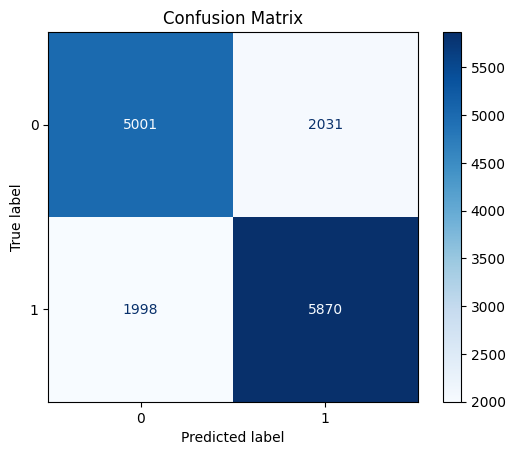

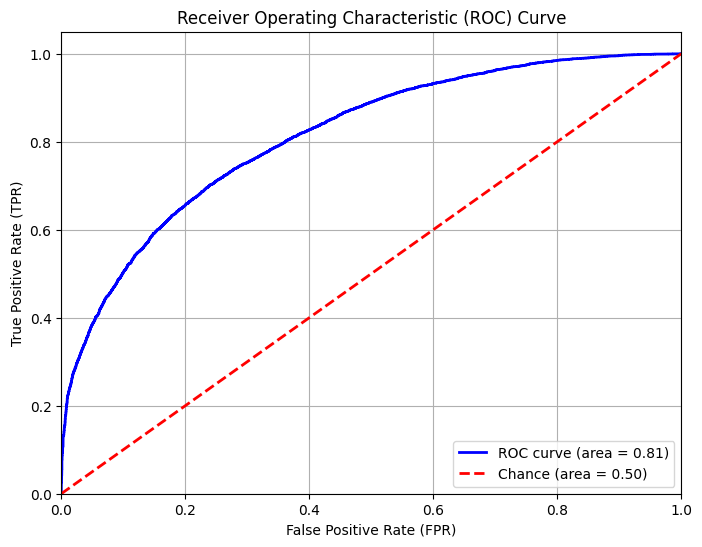

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Results from model:  SVM
              precision    recall  f1-score   support

           0       0.71      0.47      0.56      7032
           1       0.64      0.82      0.72      7868

    accuracy                           0.66     14900
   macro avg       0.67      0.65      0.64     14900
weighted avg       0.67      0.66      0.65     14900

Accuracy: 0.657
Precision: 0.668
Recall: 0.657
F1 Score: 0.645
Binary Cross Entropy: 12.356
AUC-ROC: 0.6472214968481653


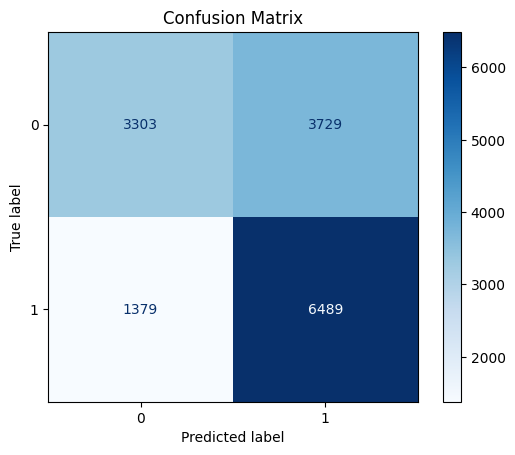

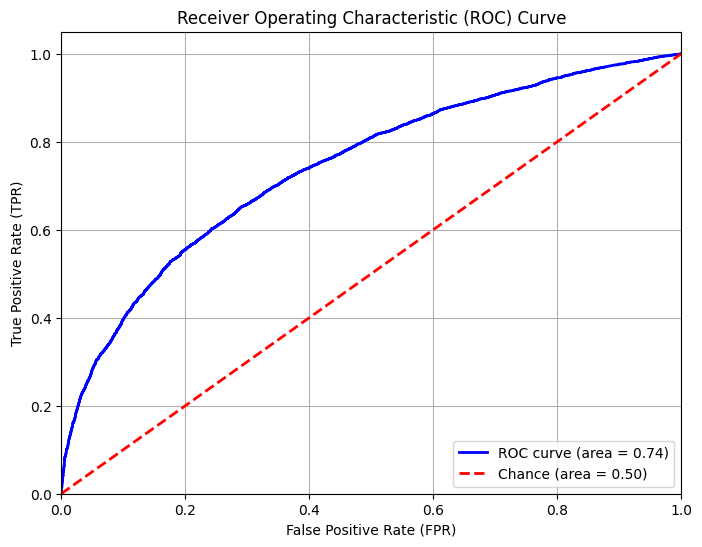

In [69]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, roc_auc_score
import numpy as np


scaler = StandardScaler()
X_train = df_OHE.drop('Attrition', axis=1)
X_train_scaled = scaler.fit_transform(X_train)
y_train = df['Attrition']


X_test =  df_test_OHE.drop('Attrition', axis=1)
X_test_scaled = scaler.transform(X_test)
y_test = df_test['Attrition']


log_reg = LogisticRegression(max_iter=10000)
svm = SVC(max_iter=10000, probability=True)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


models = [log_reg,xgb_model, svm]
model_names = ['Logistic Regression', 'xgb_model', 'SVM']


for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    print("Results from model: ", name)


    print(classification_report(y_test, y_pred, target_names=np.unique(y_train).astype(str)))


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    bce = log_loss(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)


    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Binary Cross Entropy: {bce:.3f}")
    print(f"AUC-ROC: {auc_roc}")


    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance (area = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print("\n")

### #Train and evaluate a Neural Network (MLPClassifier) for attrition prediction with performance metrics and visualizations


              precision    recall  f1-score   support

           0       0.74      0.68      0.70      7032
           1       0.73      0.78      0.76      7868

    accuracy                           0.73     14900
   macro avg       0.73      0.73      0.73     14900
weighted avg       0.73      0.73      0.73     14900

Accuracy: 0.733
Precision: 0.733
Recall: 0.733
F1 Score: 0.732
Binary Cross Entropy: 9.633
AUC-ROC: 0.7297092151327391


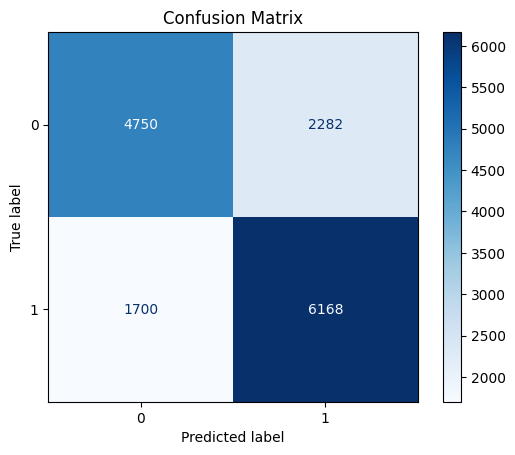

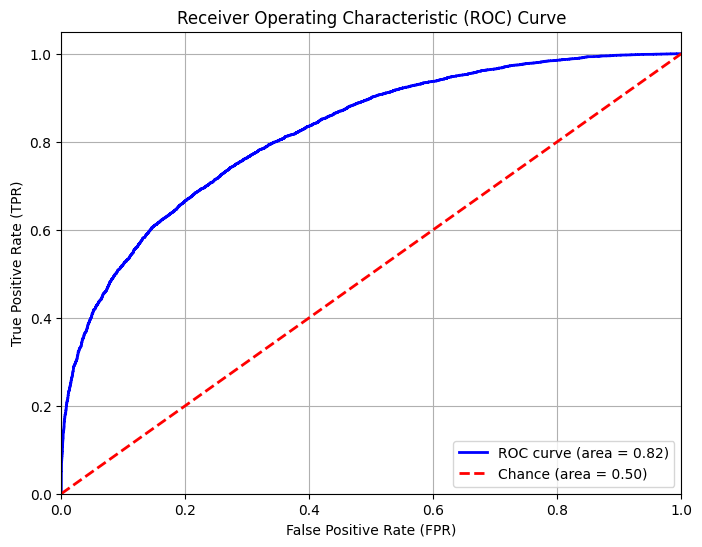

In [70]:
from sklearn.neural_network import MLPClassifier

MLPClassifierModel = MLPClassifier(activation='relu',
                                   solver='adam',
                                   learning_rate='adaptive',
                                   early_stopping= True,
                                   max_iter = 1000,
                                   alpha=0.005,
                                   hidden_layer_sizes=(50,25),
                                   random_state=33,
                                   # verbose = True,
                                  )
MLPClassifierModel.fit(X_train_scaled, y_train)

y_pred = MLPClassifierModel.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
y_scores = MLPClassifierModel.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
bce = log_loss(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Binary Cross Entropy: {bce:.3f}")
print(f"AUC-ROC: {auc_roc}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### #Convert Attrition back to labels and plot attrition count by marital status


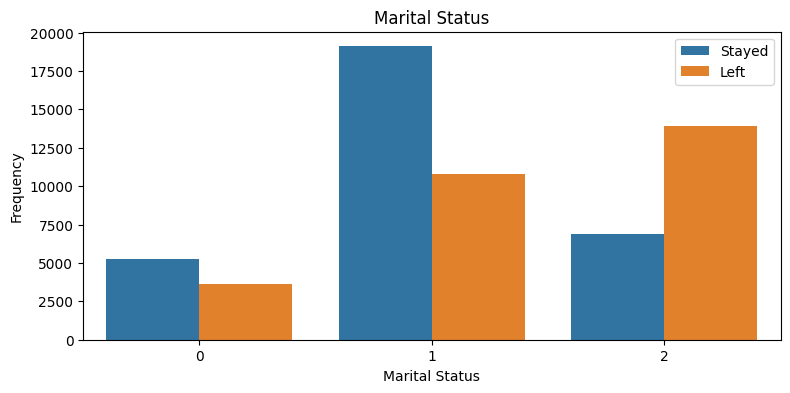

In [73]:
df['Attrition'] = le_attrition.inverse_transform(df['Attrition'])
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='Marital Status', hue="Attrition")
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### #Save the trained logistic regression model to a file


In [74]:
import joblib


joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

### #Show the names of all features used for training


In [75]:
X_train.columns

Index(['Age', 'Gender', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Marital Status', 'Remote Work',
       'Job Role_Education', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Education Level_Associate Degree',
       'Education Level_Bachelor's Degree', 'Education Level_High School',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Job Level_Entry', 'Job Level_Mid', 'Job Level_Senior',
       'Company Size_Large', 'Company Size_Medium', 'Company Size_Small'],
      dtype='object')

### #Convert feature column names to a list and store in variable 'dt'


In [76]:
dt = X_train.columns.tolist()

In [77]:
dt

['Age',
 'Gender',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Marital Status',
 'Remote Work',
 'Job Role_Education',
 'Job Role_Finance',
 'Job Role_Healthcare',
 'Job Role_Media',
 'Job Role_Technology',
 'Work-Life Balance_Excellent',
 'Work-Life Balance_Fair',
 'Work-Life Balance_Good',
 'Work-Life Balance_Poor',
 'Education Level_Associate Degree',
 "Education Level_Bachelor's Degree",
 'Education Level_High School',
 "Education Level_Master's Degree",
 'Education Level_PhD',
 'Job Level_Entry',
 'Job Level_Mid',
 'Job Level_Senior',
 'Company Size_Large',
 'Company Size_Medium',
 'Company Size_Small']

### #Print the first row of the dataframe as a dictionary


In [78]:
print(df.head(1).to_dict())

{'Age': {0: 31}, 'Gender': {0: 1}, 'Job Role': {0: 'Education'}, 'Monthly Income': {0: 5390}, 'Work-Life Balance': {0: 'Excellent'}, 'Number of Promotions': {0: 2}, 'Distance from Home': {0: 22}, 'Education Level': {0: 'Associate Degree'}, 'Marital Status': {0: 1}, 'Job Level': {0: 'Mid'}, 'Company Size': {0: 'Medium'}, 'Remote Work': {0: 0}, 'Attrition': {0: 'Stayed'}}


### #Save the scaler and label encoders to files for later use


In [79]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_gender, "le_gender.pkl")
joblib.dump(le_marital, "le_marital.pkl")
joblib.dump(le_remote, "le_remote.pkl")

['le_remote.pkl']

### #Save the list of feature column names to a file


In [80]:
joblib.dump(list(X_train.columns), "model_columns.pkl")

['model_columns.pkl']